In [24]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np


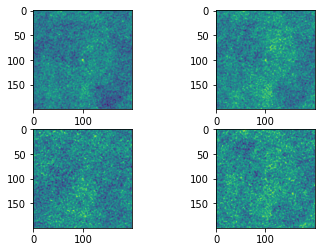

In [25]:

image0 = fits.open('image0.fits')
image1 = fits.open('image1.fits')
image2 = fits.open('image2.fits')
image3 = fits.open('image3.fits')
image4 = fits.open('image4.fits')
data0 = image0[0].data
data1 = image1[0].data
data2 = image2[0].data
data3 = image3[0].data
data4 = image4[0].data
fig, ax = plt.subplots(2,2)
ax[0][0].imshow(data0,cmap=plt.cm.viridis);
ax[0][1].imshow(data1,cmap=plt.cm.viridis);
ax[1][0].imshow(data2,cmap=plt.cm.viridis);
ax[1][1].imshow(data3,cmap=plt.cm.viridis);


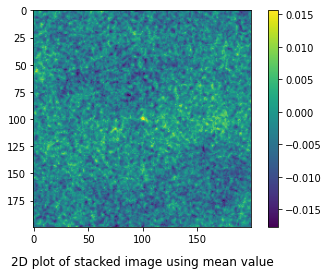

In [33]:
def image_stacking(lst):
  array1=[]
  for i in lst:
    list1=fits.open(i)
    array1.append(list1)
  final=[] 
  for i in range(len(array1[0][0].data)):
    row=[]
    for j in range(len(array1[0][0].data[0])):
      temp=[]
      for k in range(len(array1[0])):
        for l in range(len(array1)):
          mean=array1[l][k].data[i][j]
          temp.append(mean)
      row.append(sum(temp)/len(temp))
    final.append(row)
  return np.asarray(final,float)

data  = image_stacking(['image0.fits', 'image1.fits', 'image2.fits','image3.fits','image4.fits'])
plt.imshow(data.T, cmap=plt.cm.viridis)
plt.colorbar()
plt.title('2D plot of stacked image using mean value', y=-0.2)
plt.show()